# Data Upload

In [ ]:
import os
import zipfile

# Define paths
zip_path = "/content/drive/MyDrive/Teeth DataSet.zip"
extract_path = "/content/teeth_dataset"

try:
    # Open and extract the ZIP file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    print(" Data extraction completed successfully!")

except zipfile.BadZipFile:
    print(" Error: The file is not a valid ZIP file. Try re-uploading.")
except Exception as e:
    print(f" Unexpected error: {e}")



 Data extraction completed successfully!


## Samples count

In [ ]:
import os

# Define dataset paths
dataset_folders = {
    "Training": "/content/teeth_dataset/Teeth_Dataset/Training",
    "Validation": "/content/teeth_dataset/Teeth_Dataset/Validation",
    "Testing": "/content/teeth_dataset/Teeth_Dataset/Testing",
}

# Function to count images in each category
def count_images_in_folders(base_path):
    category_counts = {}

    if not os.path.exists(base_path):
        print(f"Error: The path '{base_path}' does not exist!")
        return category_counts

    for category in os.listdir(base_path):
        category_path = os.path.join(base_path, category)

        if os.path.isdir(category_path):
            images = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            category_counts[category] = len(images)

    return category_counts

# Get details for each dataset split
for dataset in dataset_folders:
    print(f"\n{dataset} Set Details:")
    details = count_images_in_folders(dataset_folders[dataset])

    if not details:
        print("No valid images found!")
        continue

    for category, count in details.items():
        print(f"{category}: {count} images")



Training Set Details:
OT: 393 images
OLP: 540 images
CoS: 450 images
Gum: 360 images
MC: 540 images
OC: 324 images
CaS: 480 images

Validation Set Details:
OT: 131 images
OLP: 180 images
CoS: 149 images
Gum: 120 images
MC: 180 images
OC: 108 images
CaS: 160 images

Testing Set Details:
output: 160 images
OT: 131 images
outputs: 160 images
OLP: 180 images
out: 160 images
CoS: 149 images
Gum: 120 images
MC: 180 images
OC: 108 images
CaS: 160 images


## Random Sample

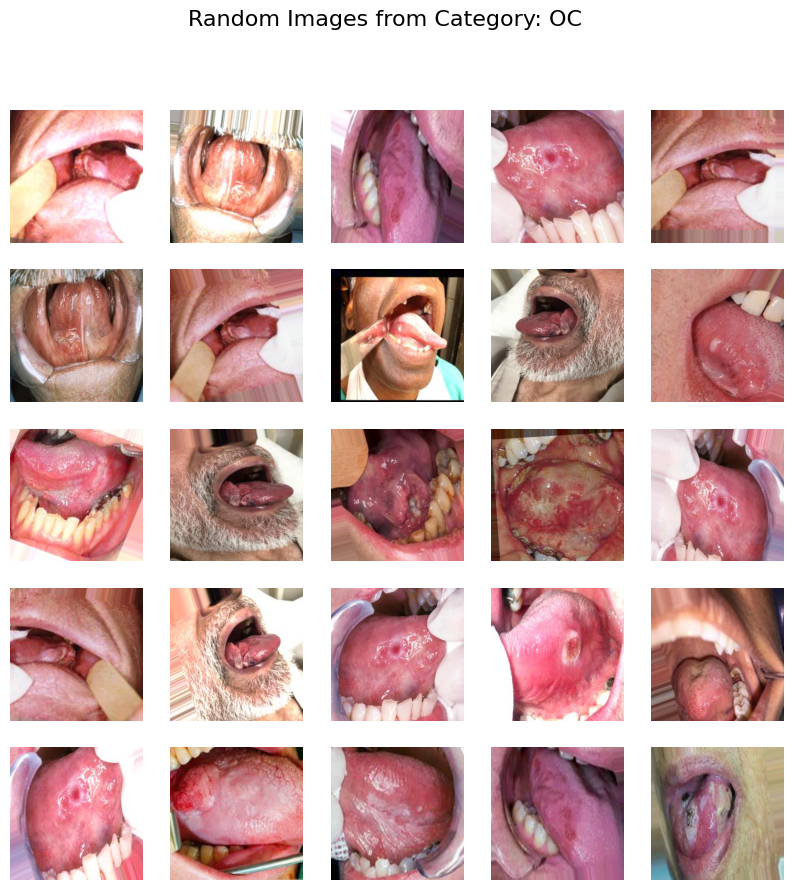

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# Define the path to the training dataset
train_path = "/content/teeth_dataset/Teeth_Dataset/Training"

# Select a random category from the training folder
random_category = random.choice(os.listdir(train_path))
category_path = os.path.join(train_path, random_category)

# Get a list of image filenames in the selected category
image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Select 25 random images from the category
sample_images = random.sample(image_files, min(25, len(image_files)))

# Create a grid to display the images (5 rows × 5 columns)
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# Load and display each image in the grid
for i, img_name in enumerate(sample_images):
    img = cv2.imread(os.path.join(category_path, img_name))  # Load the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image from BGR to RGB

    row, col = i // 5, i % 5  # Determine the image position in the grid
    axes[row, col].imshow(img)  # Display the image
    axes[row, col].axis("off")  # Hide the axes

# Add a title displaying the selected category
plt.suptitle(f"Random Images from Category: {random_category}", fontsize=16)
plt.show()


# Initial Visualization (Before Preprocessing)

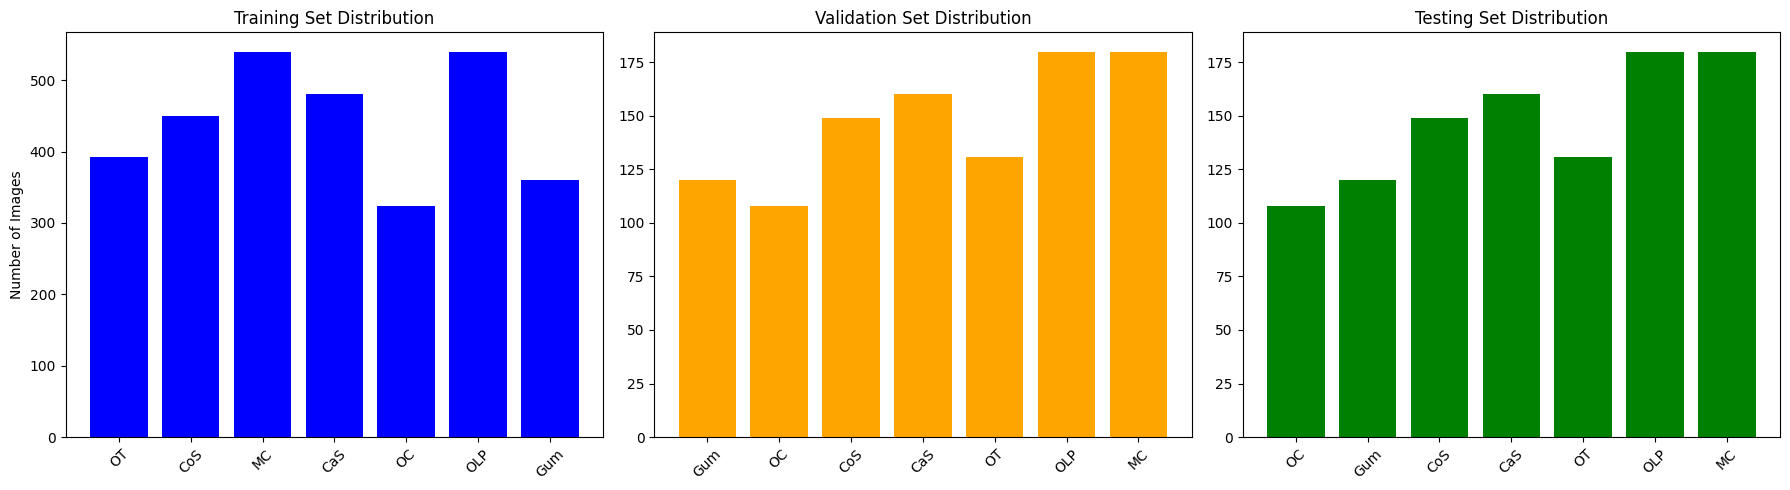

In [ ]:
import matplotlib.pyplot as plt

# Sample data: Number of images per class in each dataset
train_counts = {"OT": 393, "CoS": 450, "MC": 540, "CaS": 480, "OC": 324, "OLP": 540, "Gum": 360}
val_counts = {"Gum": 120, "OC": 108, "CoS": 149, "CaS": 160, "OT": 131, "OLP": 180, "MC": 180}
test_counts = {"OC": 108, "Gum": 120, "CoS": 149, "CaS": 160, "OT": 131, "OLP": 180, "MC": 180}

# Create subplots for Training, Validation, and Testing datasets
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Training set visualization
axes[0].bar(train_counts.keys(), train_counts.values(), color='blue')
axes[0].set_title("Training Set Distribution")
axes[0].set_ylabel("Number of Images")
axes[0].tick_params(axis='x', rotation=45)

# Validation set visualization
axes[1].bar(val_counts.keys(), val_counts.values(), color='orange')
axes[1].set_title("Validation Set Distribution")
axes[1].tick_params(axis='x', rotation=45)

# Testing set visualization
axes[2].bar(test_counts.keys(), test_counts.values(), color='green')
axes[2].set_title("Testing Set Distribution")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# Define the path to the training dataset
train_path = "/content/teeth_dataset/Teeth_Dataset/Training"

# Get the list of disease categories
categories = os.listdir(train_path)

# Set the number of images to display per category
num_images_per_category = 3

# Create a figure for displaying the images
fig, axes = plt.subplots(len(categories), num_images_per_category, figsize=(10, len(categories) * 3))

# Loop through each category and select random images
for i, category in enumerate(categories):
    category_path = os.path.join(train_path, category)

    # Get all image files in the category
    image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Select 3 random images from the category
    selected_images = random.sample(image_files, min(num_images_per_category, len(image_files)))

    # Display the images in the grid
    for j, img_name in enumerate(selected_images):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i, j].imshow(img)
        axes[i, j].axis("off")
        axes[i, j].set_title(category, fontsize=10)  # Add disease name below each image

plt.tight_layout()
plt.show()


# Preprocessing

## Resizes all images to (256x256)

In [ ]:
import os
import cv2

# Define the target size for resizing
target_size = (256, 256)

# Define dataset paths
dataset_folders = {
    "Training": "/content/teeth_dataset/Teeth_Dataset/Training",
    "Validation": "/content/teeth_dataset/Teeth_Dataset/Validation",
    "Testing": "/content/teeth_dataset/Teeth_Dataset/Testing",
}

# Define output paths for resized images
output_folders = {
    "Training": "/content/preprocessed_dataset/Training",
    "Validation": "/content/preprocessed_dataset/Validation",
    "Testing": "/content/preprocessed_dataset/Testing",
}

# Create output directories if they do not exist
for folder in output_folders.values():
    os.makedirs(folder, exist_ok=True)

# Function to resize images
def resize_and_save(dataset_path, output_path, target_size=(256, 256)):
    """Resizes all images in a dataset folder and saves them in an output folder."""
    os.makedirs(output_path, exist_ok=True)

    for category in os.listdir(dataset_path):
        category_path = os.path.join(dataset_path, category)
        output_category_path = os.path.join(output_path, category)

        if os.path.isdir(category_path):
            os.makedirs(output_category_path, exist_ok=True)

            for image_name in os.listdir(category_path):
                image_path = os.path.join(category_path, image_name)

                if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image = cv2.imread(image_path)
                    image = cv2.resize(image, target_size)  # Resize to target size

                    output_path_image = os.path.join(output_category_path, image_name)
                    cv2.imwrite(output_path_image, image)  # Save resized image

    print(f"Resizing completed for {dataset_path}. Data saved to {output_path}.")

# Apply resizing to Training, Validation, and Testing datasets
resize_and_save(dataset_folders["Training"], output_folders["Training"], target_size)
resize_and_save(dataset_folders["Validation"], output_folders["Validation"], target_size)
resize_and_save(dataset_folders["Testing"], output_folders["Testing"], target_size)

print(" All images have been resized to 256x256!")


Resizing completed for /content/teeth_dataset/Teeth_Dataset/Training. Data saved to /content/preprocessed_dataset/Training.
Resizing completed for /content/teeth_dataset/Teeth_Dataset/Validation. Data saved to /content/preprocessed_dataset/Validation.
Resizing completed for /content/teeth_dataset/Teeth_Dataset/Testing. Data saved to /content/preprocessed_dataset/Testing.
 All images have been resized to 256x256!


## Normalization

In [ ]:
import os
import cv2
import numpy as np

# Use resized images as input for normalization
dataset_folders = {
    "Training": "/content/preprocessed_dataset/Training",  # Output from resizing
    "Validation": "/content/preprocessed_dataset/Validation",
    "Testing": "/content/preprocessed_dataset/Testing",
}

# Define output paths for normalized images (can overwrite same folder or use new)
output_folders = {
    "Training": "/content/preprocessed_dataset/Training",
    "Validation": "/content/preprocessed_dataset/Validation",
    "Testing": "/content/preprocessed_dataset/Testing",
}

# Function to normalize images
def normalize_and_save(dataset_path, output_path):
    """Normalizes pixel values of all images to range [0,1] and saves them."""
    os.makedirs(output_path, exist_ok=True)

    for category in os.listdir(dataset_path):
        category_path = os.path.join(dataset_path, category)
        output_category_path = os.path.join(output_path, category)

        if os.path.isdir(category_path):
            os.makedirs(output_category_path, exist_ok=True)

            for image_name in os.listdir(category_path):
                image_path = os.path.join(category_path, image_name)

                if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image = cv2.imread(image_path)
                    image = image / 255.0  # Normalize pixel values

                    # Convert back to uint8 for saving
                    normalized_image = (image * 255).astype(np.uint8)
                    output_path_image = os.path.join(output_category_path, image_name)
                    cv2.imwrite(output_path_image, normalized_image)

    print(f"Normalization completed for {dataset_path}. Data saved to {output_path}.")

# Apply normalization to Training, Validation, and Testing datasets
normalize_and_save(dataset_folders["Training"], output_folders["Training"])
normalize_and_save(dataset_folders["Validation"], output_folders["Validation"])
normalize_and_save(dataset_folders["Testing"], output_folders["Testing"])

print("All images have been normalized to the range [0,1]!")


Normalization completed for /content/preprocessed_dataset/Training. Data saved to /content/preprocessed_dataset/Training.
Normalization completed for /content/preprocessed_dataset/Validation. Data saved to /content/preprocessed_dataset/Validation.
Normalization completed for /content/preprocessed_dataset/Testing. Data saved to /content/preprocessed_dataset/Testing.
All images have been normalized to the range [0,1]!


## Agumentation

In [ ]:
import os
import cv2
import numpy as np
import random

# Define dataset path (Only for Training Data)
dataset_folder = "/content/preprocessed_dataset/Training"

# Define output path for augmented images
output_folder = "/content/preprocessed_dataset/Training"

# Create output directory if it does not exist
os.makedirs(output_folder, exist_ok=True)

# Function to apply data augmentation
def augment_image(image):
    """Applies random rotation, flipping, and brightness changes to an image."""
    img = (image * 255).astype(np.uint8)

    # Random rotation
    angle = random.uniform(-20, 20)
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))

    # Random horizontal flip
    if random.random() > 0.5:
        img = cv2.flip(img, 1)

    # Random brightness change
    brightness_factor = random.uniform(0.7, 1.3)
    img = np.clip(img * brightness_factor, 0, 255).astype(np.uint8)

    img = img / 255.0  # Normalize
    return img

# Function to apply augmentation to training dataset
def augment_and_save(dataset_path, output_path):
    """Applies data augmentation to all images in the training dataset."""
    os.makedirs(output_path, exist_ok=True)

    for category in os.listdir(dataset_path):
        category_path = os.path.join(dataset_path, category)
        output_category_path = os.path.join(output_path, category)

        if os.path.isdir(category_path):
            os.makedirs(output_category_path, exist_ok=True)

            for image_name in os.listdir(category_path):
                image_path = os.path.join(category_path, image_name)

                if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image = cv2.imread(image_path)
                    image = cv2.resize(image, (256, 256))  # Resize
                    image = image / 255.0  # Normalize

                    # Apply augmentation
                    augmented_image = augment_image(image)

                    # Convert back to uint8 for saving
                    augmented_image = (augmented_image * 255).astype(np.uint8)
                    output_path_image = os.path.join(output_category_path, "aug_" + image_name)
                    cv2.imwrite(output_path_image, augmented_image)

    print(f"Data augmentation completed for {dataset_path}. Augmented images saved to {output_path}.")

# Apply augmentation only to the Training dataset
augment_and_save(dataset_folder, output_folder)

print("Data augmentation has been applied to the Training dataset!")


Data augmentation completed for /content/preprocessed_dataset/Training. Augmented images saved to /content/preprocessed_dataset/Training.
Data augmentation has been applied to the Training dataset!


## GrayScale

In [ ]:
import os
import cv2

# Define dataset paths
dataset_folders = {
    "Training": "/content/preprocessed_dataset/Training",
    "Validation": "/content/preprocessed_dataset/Validation",
    "Testing": "/content/preprocessed_dataset/Testing",
}

# Define output paths for grayscale images
output_folders = {
    "Training": "/content/grayscale_dataset/Training",
    "Validation": "/content/grayscale_dataset/Validation",
    "Testing": "/content/grayscale_dataset/Testing",
}

# Create output directories if they do not exist
for folder in output_folders.values():
    os.makedirs(folder, exist_ok=True)

# Function to convert images to grayscale
def convert_to_grayscale(dataset_path, output_path):
    """Converts all images in a dataset folder to grayscale and saves them."""
    os.makedirs(output_path, exist_ok=True)

    for category in os.listdir(dataset_path):
        category_path = os.path.join(dataset_path, category)
        output_category_path = os.path.join(output_path, category)

        if os.path.isdir(category_path):
            os.makedirs(output_category_path, exist_ok=True)

            for image_name in os.listdir(category_path):
                image_path = os.path.join(category_path, image_name)

                if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to Grayscale

                    output_path_image = os.path.join(output_category_path, image_name)
                    cv2.imwrite(output_path_image, image)  # Save Grayscale Image

    print(f"Grayscale conversion completed for {dataset_path}. Data saved to {output_path}.")

# Apply grayscale conversion to Training, Validation, and Testing datasets
convert_to_grayscale(dataset_folders["Training"], output_folders["Training"])
convert_to_grayscale(dataset_folders["Validation"], output_folders["Validation"])
convert_to_grayscale(dataset_folders["Testing"], output_folders["Testing"])

print(" All images have been converted to grayscale!")


Grayscale conversion completed for /content/preprocessed_dataset/Training. Data saved to /content/grayscale_dataset/Training.
Grayscale conversion completed for /content/preprocessed_dataset/Validation. Data saved to /content/grayscale_dataset/Validation.
Grayscale conversion completed for /content/preprocessed_dataset/Testing. Data saved to /content/grayscale_dataset/Testing.
 All images have been converted to grayscale!


## Visualization (after preprocessing)

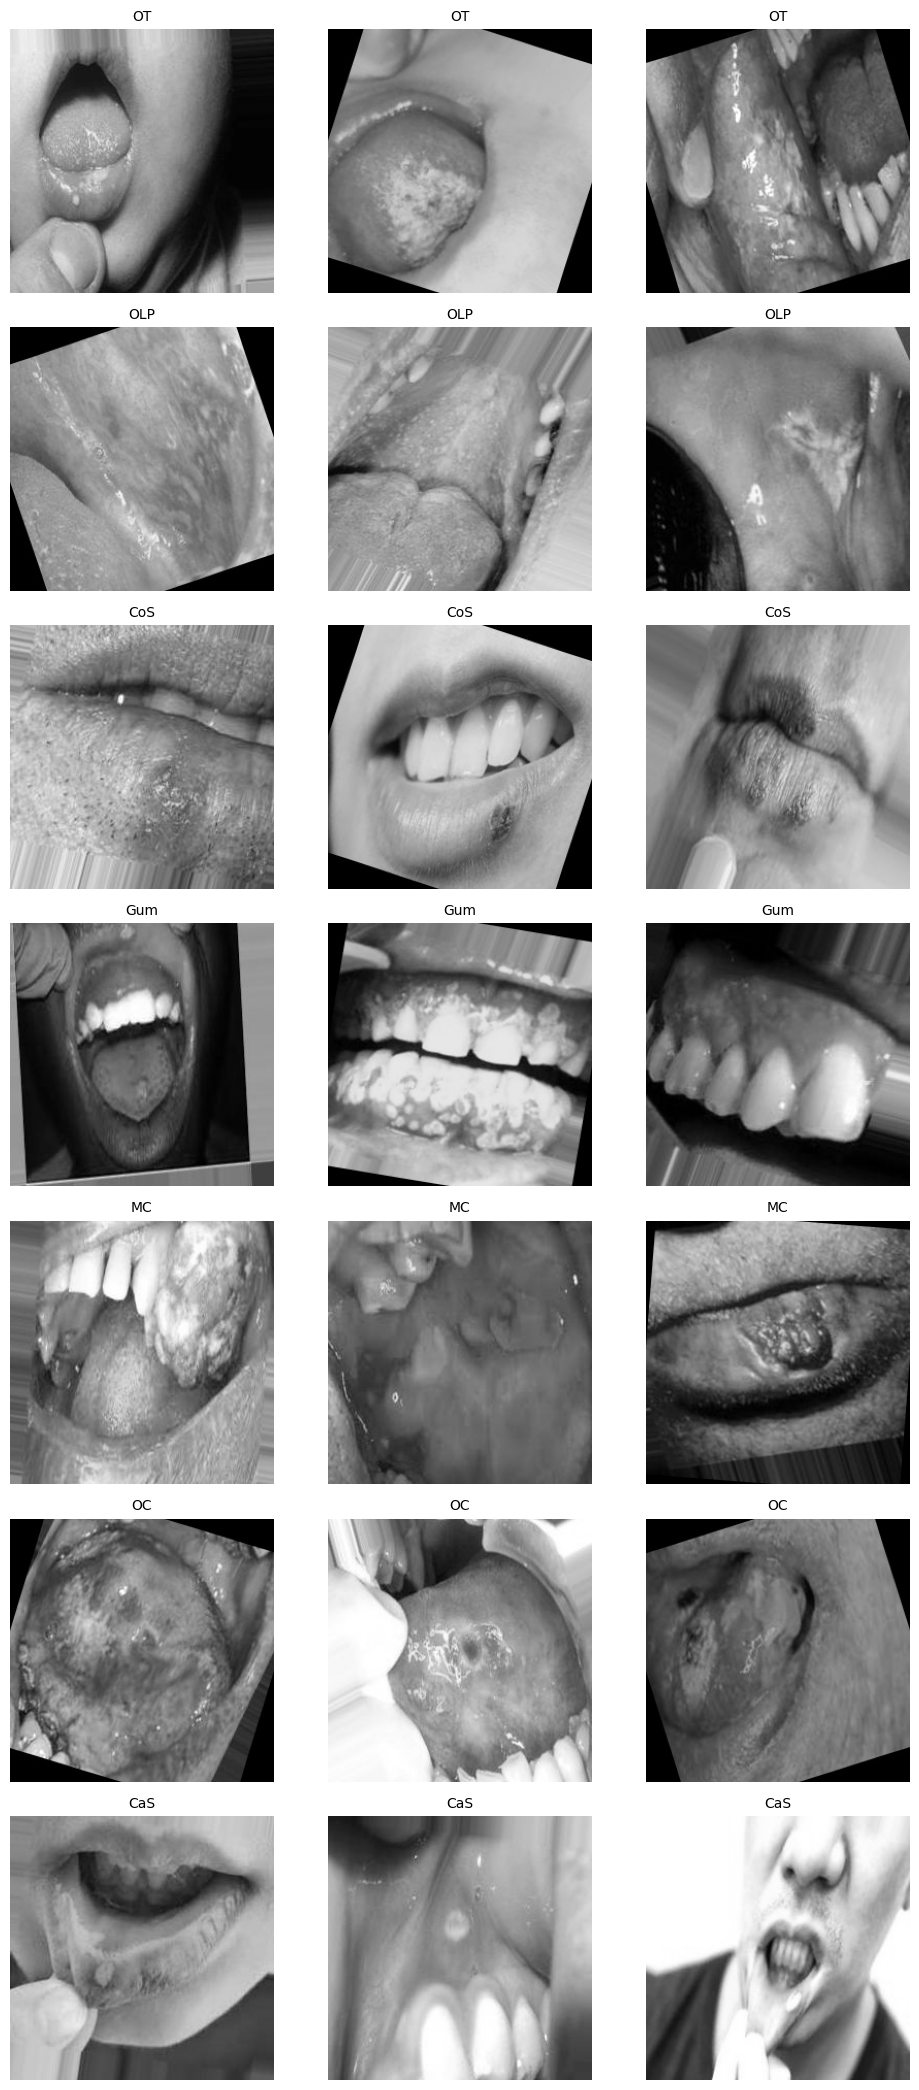

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# Define the path to the training dataset
train_path = "/content/grayscale_dataset/Training"

# Get the list of disease categories
categories = os.listdir(train_path)

# Set the number of images to display per category
num_images_per_category = 3

# Create a figure for displaying the images
fig, axes = plt.subplots(len(categories), num_images_per_category, figsize=(10, len(categories) * 3))

# Loop through each category and select random images
for i, category in enumerate(categories):
    category_path = os.path.join(train_path, category)

    # Get all image files in the category
    image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Select 3 random images from the category
    selected_images = random.sample(image_files, min(num_images_per_category, len(image_files)))

    # Display the images in the grid
    for j, img_name in enumerate(selected_images):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i, j].imshow(img)
        axes[i, j].axis("off")
        axes[i, j].set_title(category, fontsize=10)  # Add disease name below each image

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define dataset paths
train_dir = "/content/grayscale_dataset/Training"
val_dir = "/content/grayscale_dataset/Validation"
test_dir = "/content/grayscale_dataset/Testing"

# Define image size and batch size
IMG_SIZE = (256, 256)
BATCH_SIZE = 32

# Load training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Load validation dataset
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Load test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    shuffle=False,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Check the class names
class_names = train_dataset.class_names
print(f"Class names: {class_names}")


Found 6174 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1508 files belonging to 10 classes.
Class names: ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


In [ ]:
# Define the CNN model
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(256, 256, 3)),  # Normalize images

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Regularization
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      16,777,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,871,495 (64.36 MB)

 Trainable params: 16,871,495 (64.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define training parameters
EPOCHS = 22

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS
)


Epoch 1/22
193/193 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.9296 - loss: 0.1953 - val_accuracy: 0.4990 - val_loss: 2.5898
Epoch 2/22
193/193 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.9153 - loss: 0.2147 - val_accuracy: 0.5097 - val_loss: 2.6581
Epoch 3/22
193/193 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.9291 - loss: 0.1925 - val_accuracy: 0.5000 - val_loss: 2.8045
Epoch 4/22
193/193 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.9439 - loss: 0.1630 - val_accuracy: 0.4971 - val_loss: 2.9433
Epoch 5/22
193/193 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.9266 - loss: 0.2080 - val_accuracy: 0.4961 - val_loss: 3.1429
Epoch 6/22
193/193 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.9333 - loss: 0.1953 - val_accuracy: 0.4912 - val_loss: 2.9177
Epoch 7/22
193/193 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9356 - loss: 0.1744 - val_accuracy: 0.5068 - val_loss: 2.9191
Epoch 8/22
193/193 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9369 - loss: 0.1714 - 